In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle


plt.style.use("dark_background")

### <font color = "Orange"> Load Dataset </font>

In [101]:
df = load_boston()

/Users/rishabhmer/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cali

In [102]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [103]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [104]:
# Adding data in DataFrame

df_boston = pd.DataFrame(data=df.data, columns=df.feature_names)
df_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### <font color = "deepskyblue"> Adding target value in the dataframe (Price) </font>

In [105]:
df_boston["Price"] = df.target

In [106]:
df_boston.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [107]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [108]:
# Checking for Missing Values
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [109]:
# Summarization of Data 

# Only numerical data are consider
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### <font color = "Orange"> EDA </font>

In [110]:
# Finding Correlation

# checking corr between independant features and also for target

df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


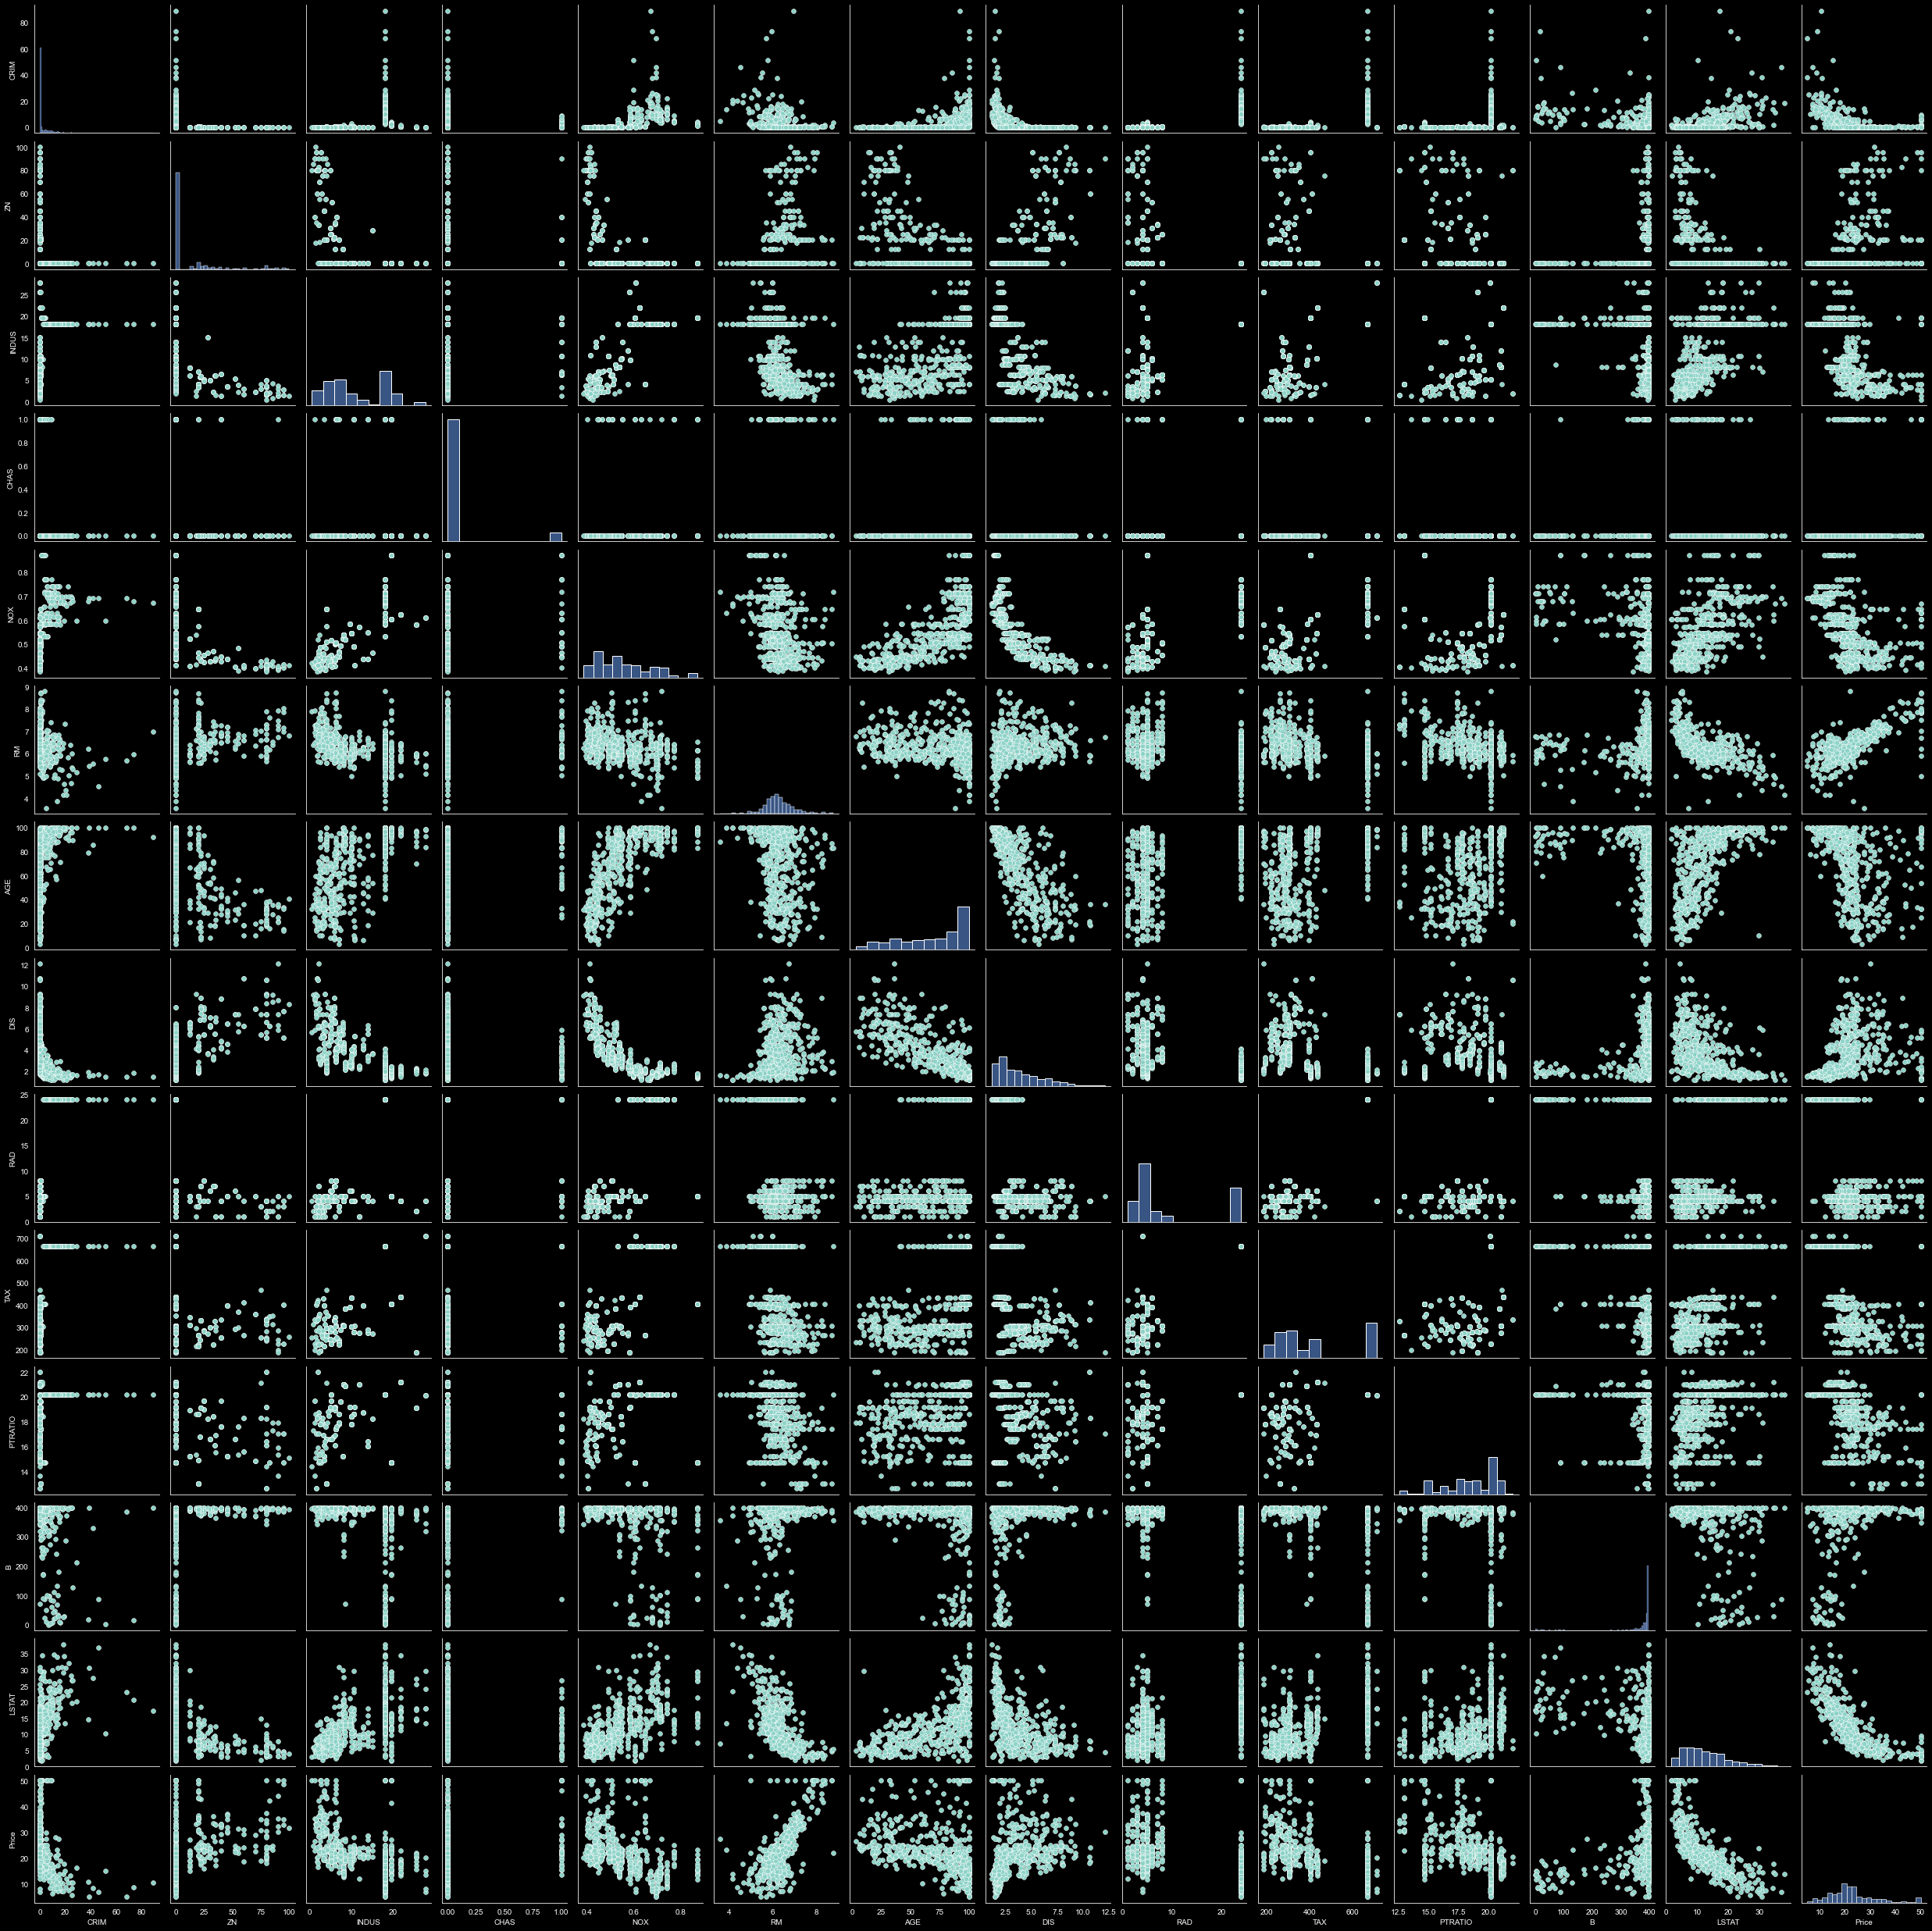

In [111]:
sns.pairplot(df_boston)

### <font color = "Orange">Analyzing the Data through Visualization </font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


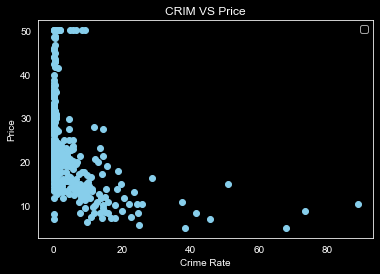

In [112]:
# Scatter plot -> CRIM - Price

plt.scatter(x=df_boston["CRIM"], y=df_boston["Price"],c="skyblue")
plt.title("CRIM VS Price")
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.legend()
plt.show()

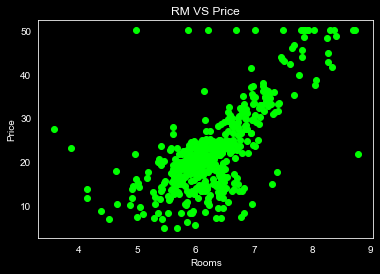

In [113]:
# Scatter plot -> RM - Price

plt.scatter(x=df_boston["RM"], y=df_boston["Price"],c="lime")
plt.title("RM VS Price")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

##### <font color = "darkviolet"> From above scatter plot we find that more number of rooms leads to higher price </font>

### <font color = "Orange"> Creating Regression Ploting </font>

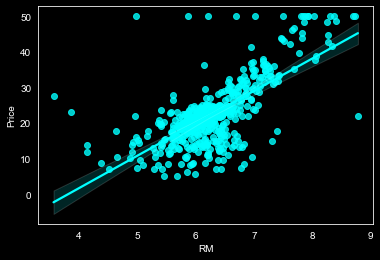

In [114]:
sns.regplot(x="RM", y="Price",data=df_boston,color="cyan")
plt.show()

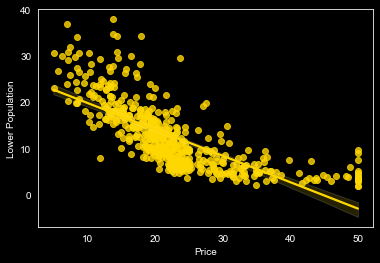

In [115]:
# Regplot -> LSTAT VS Price
sns.regplot(x="Price", y="LSTAT",data=df_boston,color="gold")
plt.xlabel("Price")
plt.ylabel("Lower Population")
plt.show()

##### <font color ="gold"> We can observe that the lower populaton (LSTAT) stay in the house  where price is less</font>

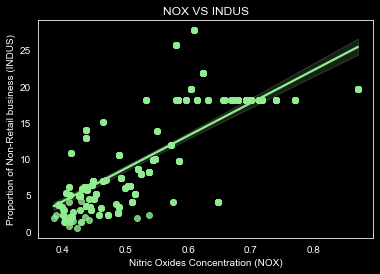

In [116]:
# Regplot -> NOX VS INDUS
sns.regplot(x="NOX", y="INDUS",data=df_boston,color="lightgreen")
plt.title("NOX VS INDUS")
plt.xlabel("Nitric Oxides Concentration (NOX)")
plt.ylabel("Proportion of Non-Retail business (INDUS)")
plt.show()

##### <font color ="skyblue"> We can observe that with increase in Non Retail business there is increase  in Nitric  Oxides</font>

In [117]:
## Independent and Dependant Features

X = df_boston.iloc[:,:-1]
y = df_boston.iloc[:,-1]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=33)

### <font color =  "Yellow"> Standardization </font>

In [119]:
# Main aim of Linear Regression is to converge to gradient descent -> Standardization of dataset
# all should in same scale 

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)

# only transform (prevention of overfitting)
X_test = standard_scaler.transform(X_test)

In [121]:
pickle.dump(standard_scaler, open('scaler.pkl', 'wb'))

In [72]:
linear_reg = LinearRegression()

linear_reg.fit(X_train,y_train)

LinearRegression()

In [73]:
# coefficinets and intercepts 

print(linear_reg.coef_)
print(linear_reg.intercept_)

[-1.08657462  1.1479163  -0.00451461  0.81603592 -1.6275885   2.94324953
 -0.16228371 -3.19866086  2.7557466  -2.28731516 -1.99028819  0.51742123
 -3.85302579]
22.946610169491528


In [75]:
print(linear_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [76]:
# Prediction Test Data 

y_pred = linear_reg.predict(X_test)

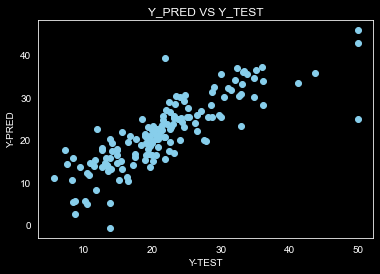

In [82]:
plt.scatter(y_test, y_pred,c="skyblue")
plt.title("Y_PRED VS Y_TEST")
plt.xlabel("Y-TEST")
plt.ylabel("Y-PRED")
plt.show()

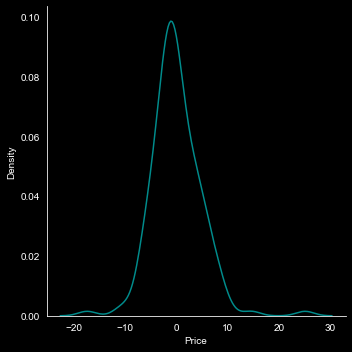

In [83]:
# Errors (Residuals)

errors =  y_test - y_pred

sns.displot(errors,kind="kde",color="darkcyan")

# main aim is to normalize 

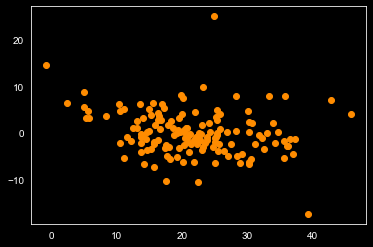

In [85]:
plt.scatter(y_pred, errors, c = "darkorange")
# uniform distribution

In [89]:
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  22.794687033798507
MAE:  3.4397227627024547
RMSE:  4.774378182946813


In [92]:
score = score = r2_score(y_test,y_pred)
print("R2 Score: ", round(score,2))

R2 Score:  0.68


In [94]:
# Adjusted R2 Score 

adj_score = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1]-1)
print("Adjusted R2 Score: ", round(adj_score,2)) 

Adjusted R2 Score:  0.65


### <font color = "orange"> Deployment of Model </font>

In [97]:
pickle.dump(linear_reg, open('linear_reg.pkl','wb'))

In [98]:
pickled = pickle.load(open('linear_reg.pkl','rb'))

In [99]:
pickled.predict(standard_scaler.transform(df.data[0].reshape(1,-1)))

/Users/rishabhmer/opt/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.22113715])